In [7]:
import tensorflow as tf
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import os
import cv2
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split


# Dataset


In [2]:
import pickle

"""
Load pickled training and test data
"""
def load_pickled_data(file, cols):
    with open(file, mode ='rb') as f:
        dataset = pickle.load(f)
        
    return tuple(map(lambda c: dataset[c], cols))



In [3]:
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, -1]
train_file = "Train"
test_file = "Test"

IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
print(signnames)
print(signnames[0])


['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vechiles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']
Speed limit (20km/h)


# Visualizing the Dataset

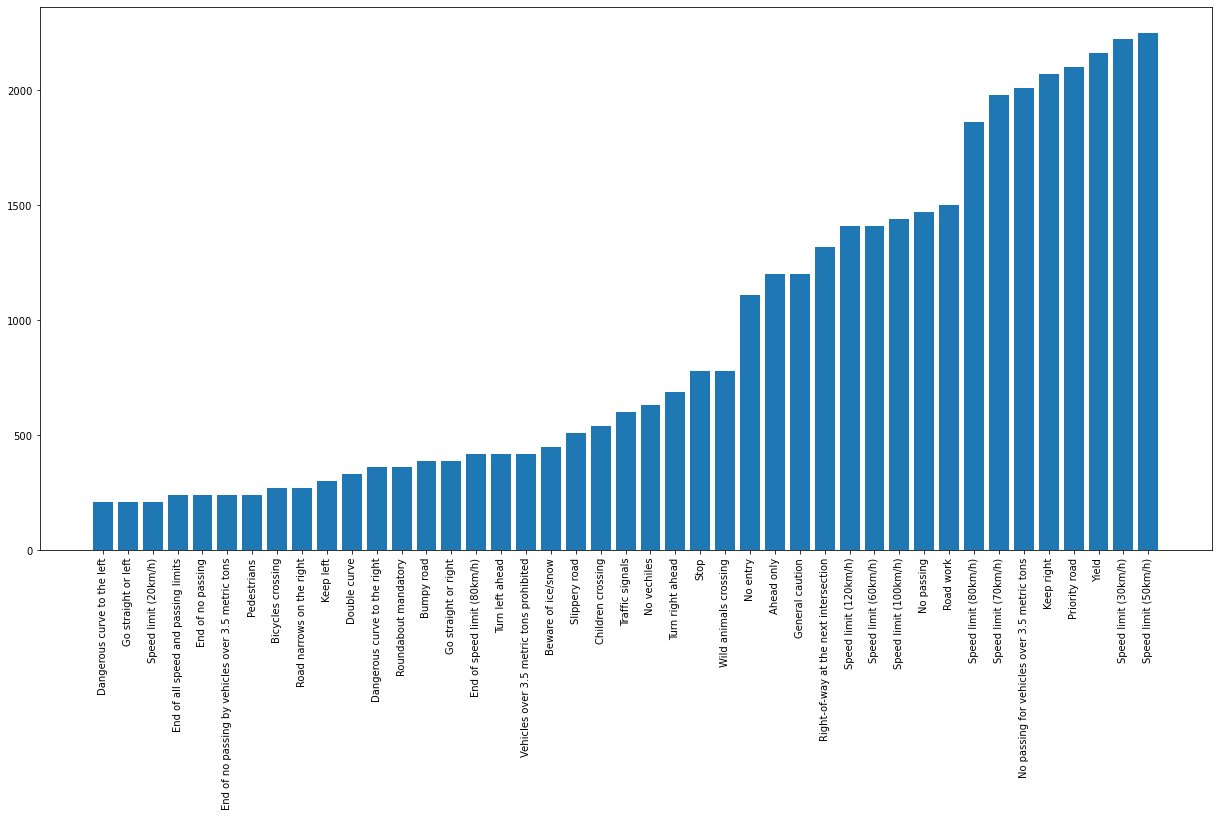

In [4]:
folders = os.listdir(train_file)
train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_file + "/" + folder)
    train_number.append(len(train_files))
    class_num.append(signnames[int(folder)])

zip_lists = zip(train_number, class_num)
sort_pairs = sorted(zip_lists)
tuples = zip(*sort_pairs)

train_number, class_num = [list(tuple) for tuple in  tuples]


plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation = 'vertical')
plt.show()

The training dataset is not balanced.

## 30 random images from test data.

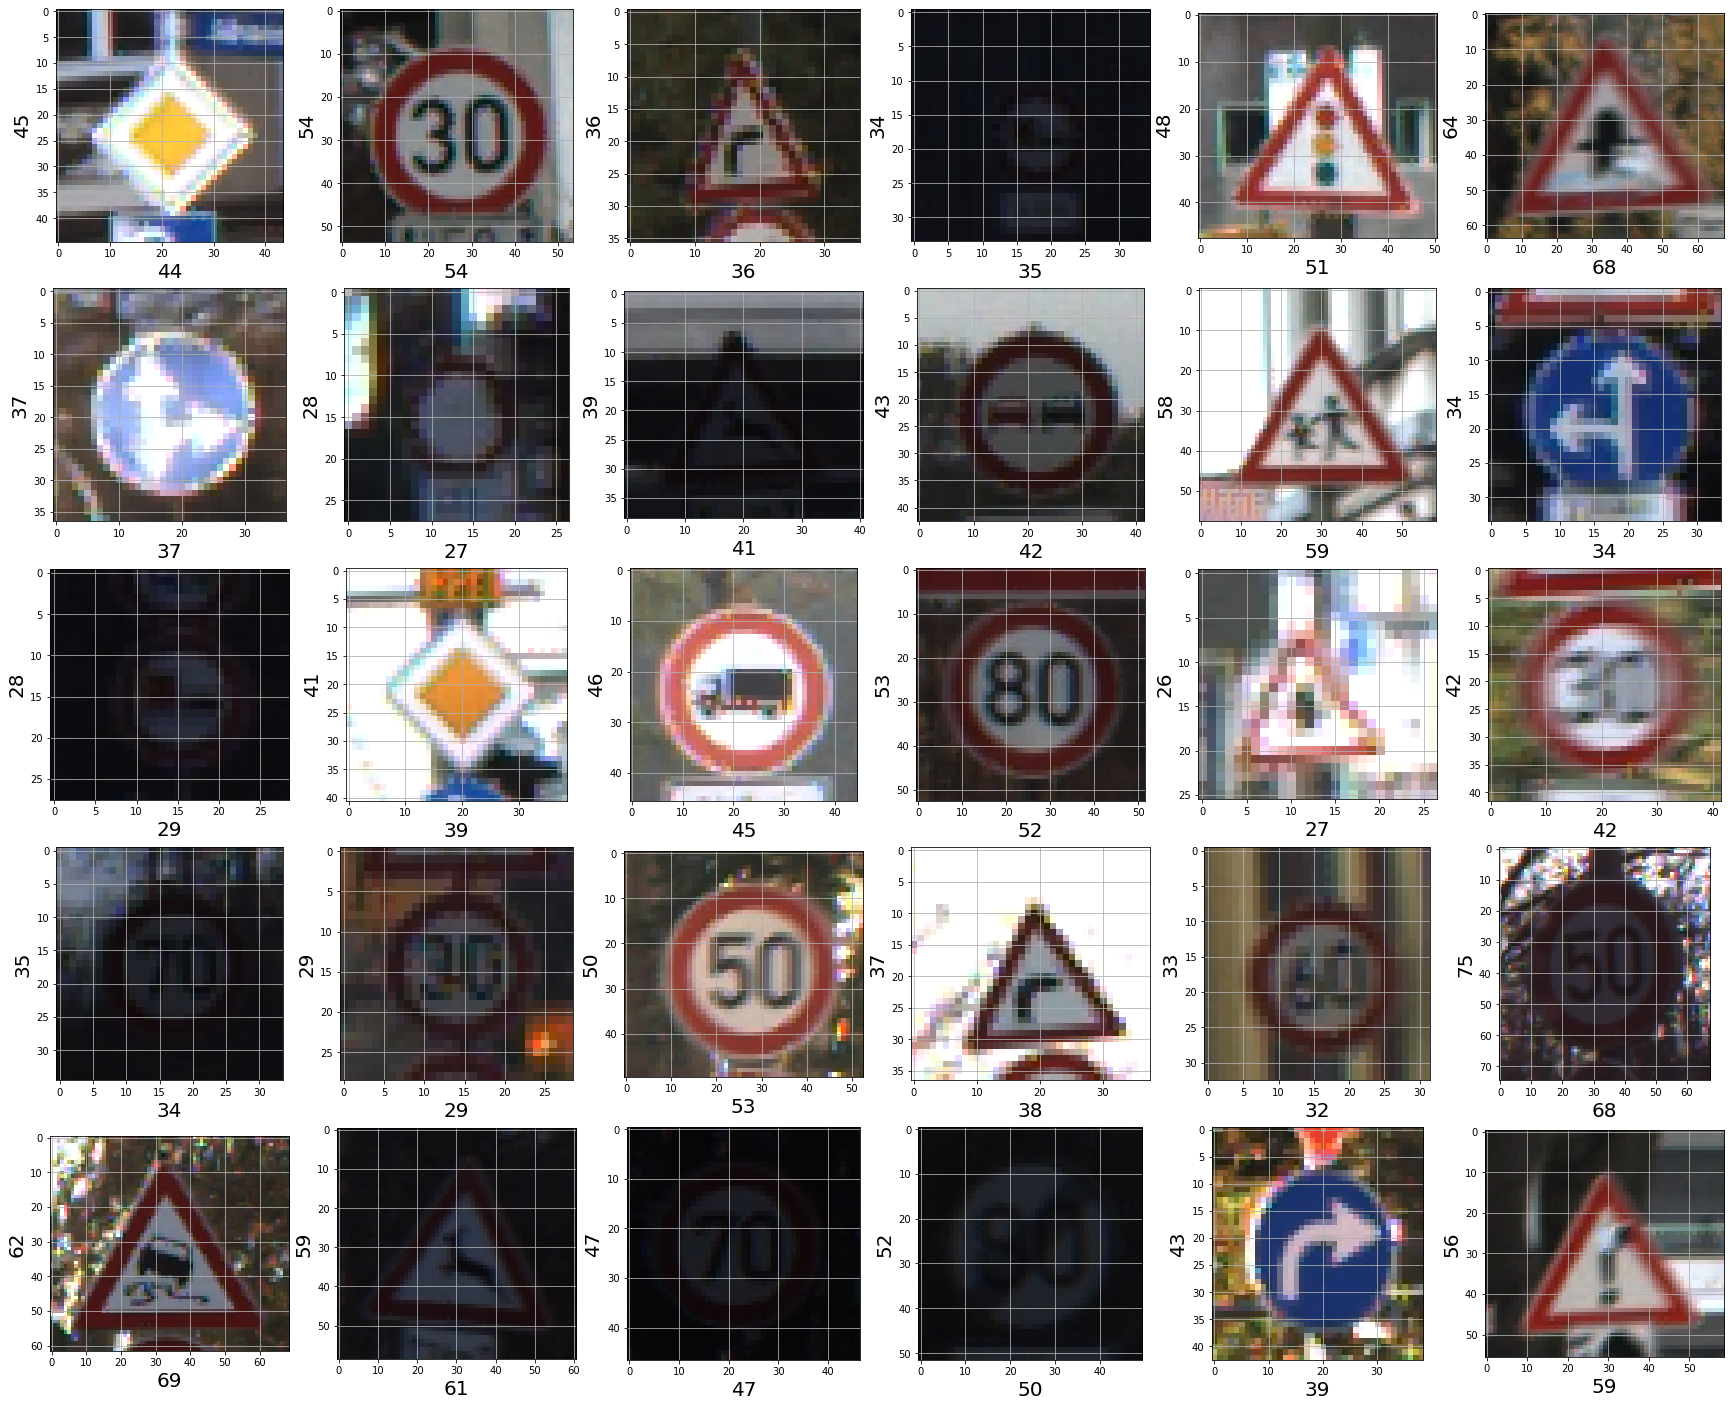

In [5]:
import random
from matplotlib.image import imread

test = read_csv("Test.csv")
imgs = test["Path"].values

plt.figure(figsize=(30,30))

for i in range (1, 31):
    plt.subplot(6,6,i)
    rand_img_path = random.choice(imgs)
    rand_img = imread(rand_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)
    plt.ylabel(rand_img.shape[0], fontsize = 20)

Collecting training data.

In [6]:
img_features = []
img_labels = []

for i in tqdm(range(43)):
    path = "Train/" + str(i)
    imgs = os.listdir(path)
    for img in imgs:
        image = cv2.imread(path + '/' + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resized_image = image_from_array.resize((IMG_HEIGHT, IMG_WIDTH))
        img_features.append(np.array(resized_image))
        img_labels.append(i)
#         try:
#             image = cv2.imread(path + '/' + img)
#             image_from_array = Image.fromarray(image, 'RGB')
#             resized_image = image_from_array.resize((IMG_HEIGHT, IMG_WIDTH))
#             img_features.append(np.array(resized_image))
#             image_labels.append(i)
            
#         except:
#             print("Error for " + img)
            
img_features = np.array(img_features)

img_labels = np.array(img_labels)

100%|██████████| 43/43 [04:23<00:00,  6.14s/it]


Shuffle training dataset to prep for train test split

In [ ]:

shuffle_indices = np.arange(img_features.shape[0])
np.random.shuffle(shuffle_indices)

img_features = img_features[shuffle_indices]
img_labels = img_labels[shuffle_indices]

Split our train data into training and validation sets